In [1]:
import numpy as np 
import pandas as pd 
import os

filename='diabetes.csv'
dirname=os.getcwd()

In [2]:
df=pd.read_csv(os.path.join(dirname,filename))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## Data Cleaning

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are zero values on important biological variables. Maybe, they use zero for NA values.


In [4]:
colsWithMissingValues=[col for col in df.columns if df[col].isin([0]).any()]
colsWithMissingValues

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Outcome']

Pregnancies and Outcome are ok.

In [5]:
colsWithMissingValues=[name for name in colsWithMissingValues if name!='Pregnancies' and name!='Outcome']
dataWithZeros=df[colsWithMissingValues]
print(df.shape)
missingValCountByColumn=(dataWithZeros.isin([0]).sum())
print(missingValCountByColumn[missingValCountByColumn>0])

(768, 9)
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Insulin and SkinThickness have more zero values.

In [6]:
processedData=pd.DataFrame()
for col in colsWithMissingValues:
    processedData[col]=dataWithZeros[col].replace(0, dataWithZeros[col].mean())

processedData['Pregnancies']=df.Pregnancies
processedData['Outcome']=df.Outcome
processedData.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Outcome
0,148.0,72.0,35.000000,79.799479,33.6,6,1
1,85.0,66.0,29.000000,79.799479,26.6,1,0
2,183.0,64.0,20.536458,79.799479,23.3,8,1
3,89.0,66.0,23.000000,94.000000,28.1,1,0
4,137.0,40.0,35.000000,168.000000,43.1,0,1


## Exploratory Data Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

What are the correlation between columns?

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.129459,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.141282,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,-0.081672,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,-0.073535,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.017683,0.292695
Pregnancies,0.129459,0.141282,-0.081672,-0.073535,0.017683,1.000000,0.221898
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.221898,1.000000


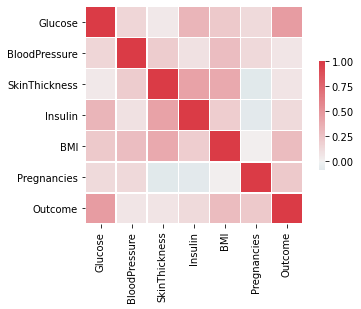

In [8]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[processedData.columns].corr(),vmax=1,center=0,square=True,cmap=cmap,linewidth=.5,cbar_kws={"shrink":.5})
df[processedData.columns].corr()

There is no evident relationship between pregnancies and diabetes.
0.131 correlation value for insulin and outcome. Mmmm, as insulin levels decrease, diabetes chances should increase. It is possible that the data has been collected from people only with diabetes type 2.

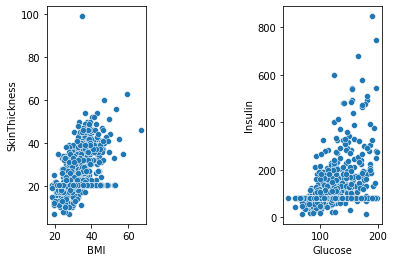

In [9]:
plt.subplot(1,3,1)
sns.scatterplot(x=processedData.BMI, y=processedData.SkinThickness)
plt.subplot(1,3,3)
sns.scatterplot(x=processedData.Glucose, y=processedData.Insulin)
plt.show()

There is a relationship between skin thickness and body mass index (BMI).

<AxesSubplot:xlabel='Insulin', ylabel='SkinThickness'>

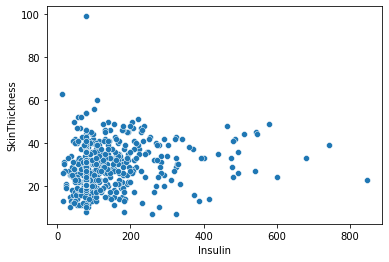

In [10]:
sns.scatterplot(x=processedData.Insulin, y=processedData.SkinThickness)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

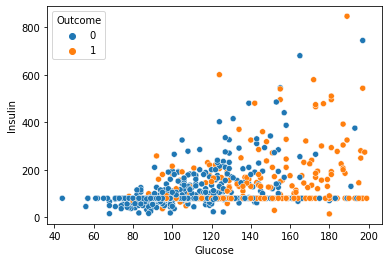

In [11]:
sns.scatterplot(x=processedData.Glucose, y=processedData.Insulin, hue=processedData.Outcome)

A orange dots cluster (diabetic) is to be expected in a zone of high glucose and low insulin. Also, there are outliers.

## Standardize data

In [29]:
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import StandardScaler

# Remove all rows that have outliers in at least one column.
condition=(np.abs(zscore(processedData)) < 3).all(axis=1)
withoutOutliers=processedData[condition]
outcome=withoutOutliers['Outcome']
withoutOutliers=withoutOutliers.drop(['Outcome'],axis=1)
scaler=StandardScaler().fit(withoutOutliers)
standardizeData=pd.DataFrame(scaler.transform(withoutOutliers))
standardizeData.columns=withoutOutliers.columns
standardizeData.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies
count,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02
mean,-4.617070e-17,-2.114132e-16,-1.263619e-16,1.020615e-16,4.860073e-17,1.944029e-17
std,1.000685e+00,1.000685e+00,1.000685e+00,1.000685e+00,1.000685e+00,1.000685e+00
min,-2.576852e+00,-2.996493e+00,-2.137990e+00,-1.496178e+00,-2.142368e+00,-1.168345e+00
25%,-7.164610e-01,-7.105474e-01,-6.209826e-01,-4.481228e-01,-7.245817e-01,-8.624494e-01
50%,-1.414310e-01,-7.179382e-03,-4.569660e-01,-4.481228e-01,-1.568865e-02,-2.506585e-01
75%,6.027254e-01,6.961886e-01,6.637164e-01,2.020729e-01,6.161508e-01,6.670278e-01
max,2.666068e+00,3.157977e+00,3.129218e+00,4.601350e+00,3.205151e+00,2.808296e+00


## Modeling: Random Forest, Balance Random Forest, XGBoost

In [32]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest=train_test_split(standardizeData, outcome, test_size=0.2, random_state=0)

### Random Forest Classifier

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

RFModel=RandomForestClassifier(n_estimators=100, criterion="entropy", max_features="sqrt", 
                               max_depth=8, min_samples_split=4, bootstrap=False, random_state=0,
                              min_samples_leaf=1, class_weight="balanced_subsample")

scoresRFModel=cross_val_score(RFModel, xTrain, yTrain,cv=12, scoring="accuracy")
print("Mean Accuracy: ", scoresRFModel.mean())
RFModel.fit(xTrain, yTrain)

Mean Accuracy:  0.7517715419501134


RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=8, max_features='sqrt',
                       min_samples_split=4, random_state=0)

### Balanced Random Forest Classifier

In [34]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [35]:
BRFModel=BalancedRandomForestClassifier(n_estimators=100, criterion="entropy", max_features="sqrt", 
                               max_depth=4, min_samples_split=4, bootstrap=True, random_state=0,
                              min_samples_leaf=1, class_weight="balanced_subsample")

scoresBRFModel=cross_val_score(BRFModel, xTrain, yTrain, cv=6, scoring="accuracy")
print("Mean Accuracy: ", scoresBRFModel.mean())
BRFModel.fit(xTrain, yTrain)

Mean Accuracy:  0.7312223858615611


BalancedRandomForestClassifier(class_weight='balanced_subsample',
                               criterion='entropy', max_depth=4,
                               max_features='sqrt', min_samples_split=4,
                               random_state=0)

### XGBoost

In [74]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

XGBModel = XGBClassifier(n_estimators=100, learning_rate=0.05, eval_metric="logloss")
scoresXGBModel=cross_val_score(XGBModel, xTrain, yTrain, cv=6, scoring="accuracy")
print("Mean Accuracy: ", scoresXGBModel.mean())
XGBModel.fit(xTrain, yTrain)

Mean Accuracy:  0.7551546391752577


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Testing

In [72]:
predictionsRF=RFModel.predict(xTest)
predictionsBRF=BRFModel.predict(xTest)
predictionsXGB=XGBModel.predict(xTest)

errorRF=accuracy_score(yTest,predictionsRF)
errorBRF=accuracy_score(yTest,predictionsBRF)
errorXGB=accuracy_score(yTest,predictionsXGB)
print("Random Forest Accuracy with Test dataset: ", errorRF)
print("Random Forest Accuracy with Test dataset: ", errorBRF)
print("Random Forest Accuracy with Test dataset: ", errorXGB)

Random Forest Accuracy with Test dataset:  0.6938775510204082
Random Forest Accuracy with Test dataset:  0.7074829931972789
Random Forest Accuracy with Test dataset:  0.7210884353741497


### Confusion Matrix: Random Forest

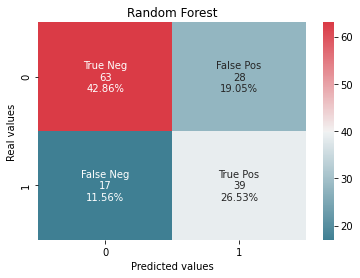

In [61]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cmRF=confusion_matrix(yTest,predictionsRF)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmRF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmRF.flatten()/np.sum(cmRF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmRF,annot=labels, fmt='', cmap=cmap)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.title('Random Forest')
plt.show()

In [64]:
print(classification_report(yTest,predictionsRF, target_names=['No diabetes','Diabetes']))

              precision    recall  f1-score   support

 No diabetes       0.79      0.69      0.74        91
    Diabetes       0.58      0.70      0.63        56

    accuracy                           0.69       147
   macro avg       0.68      0.69      0.69       147
weighted avg       0.71      0.69      0.70       147



### Confusion Matrix: Balanced Random Forest

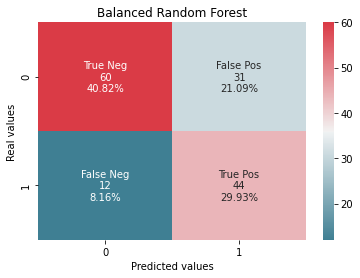

In [55]:
cmBRF=confusion_matrix(yTest,predictionsBRF, labels=[0,1])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmBRF.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmBRF.flatten()/np.sum(cmBRF)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmBRF,annot=labels, fmt='', cmap=cmap)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.title('Balanced Random Forest')
plt.show()

In [65]:
print(classification_report(yTest,predictionsBRF, target_names=['No diabetes','Diabetes']))

              precision    recall  f1-score   support

 No diabetes       0.83      0.66      0.74        91
    Diabetes       0.59      0.79      0.67        56

    accuracy                           0.71       147
   macro avg       0.71      0.72      0.70       147
weighted avg       0.74      0.71      0.71       147



Good Recall: 79% of the diabetes cases are detected.

### Confusion Matrix: XGBoost

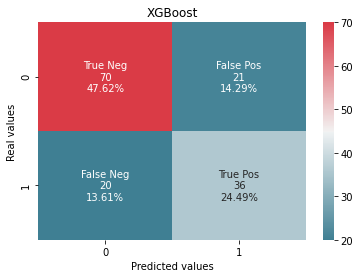

In [56]:
cmXGB=confusion_matrix(yTest,predictionsXGB, labels=[0,1])
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmXGB.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmXGB.flatten()/np.sum(cmXGB)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmXGB,annot=labels, fmt='', cmap=cmap)
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.title('XGBoost')
plt.show()

In [66]:
print(classification_report(yTest,predictionsXGB, target_names=['No diabetes','Diabetes']))

              precision    recall  f1-score   support

 No diabetes       0.78      0.77      0.77        91
    Diabetes       0.63      0.64      0.64        56

    accuracy                           0.72       147
   macro avg       0.70      0.71      0.71       147
weighted avg       0.72      0.72      0.72       147

